In [1]:

#!pip install wordcloud
#!pip install nltk

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import networkx as nx
from collections import Counter
from nltk import ngrams
from collections import defaultdict, Counter
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

(TS=("Blockchain" AND ("Artificial Intelligence" OR "AI" OR "Machine Learning" OR "Deep Learning" 
OR "Neural Networks" OR "Natural Language Processing" OR "Computer Vision" 
OR "Reinforcement Learning" OR "Big Data Analytics" OR "Data Mining" 
OR "Generative AI" OR "Federated Learning" OR "Explainable AI" OR "Edge AI")) 
AND LA=("English") 
AND DT=("Article") 
AND PY=(2016-2024))

4837adet makale

In [2]:
# 1. Dosyanƒ±n Okunmasƒ±
df = pd.read_excel("/kaggle/input/blockyeni/savedrecs.xls")
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
# Tekrar eksik deƒüerleri kontrol et
df.isnull().sum()

<ipython-input-2-ea22909e1c0a>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda s: s.lower() if type(s) == str else s)


Publication Type            0
Authors                     0
Book Authors             4827
Book Editors             4789
Book Group Authors       4837
                         ... 
Highly Cited Status      4837
Hot Paper Status         4837
Date of Export              0
UT (Unique WOS ID)          0
Web of Science Record       0
Length: 72, dtype: int64

In [3]:
print(df.columns)

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

Authors
zhu, lh          22
wang, x          23
zhang, j         23
xiong, zh        23
wang, h          24
kumar, s         26
li, y            26
sharma, r        26
zheng, zb        27
kang, jw         28
srivastava, g    28
kumar, a         31
park, jh         32
guizani, m       35
wu, j            35
gupta, r         36
kumar, p         36
li, j            37
kumar, r         37
liu, y           40
kumar, n         41
niyato, d        43
yu, fr           43
zhang, y         61
tanwar, s        69
Name: count, dtype: int64


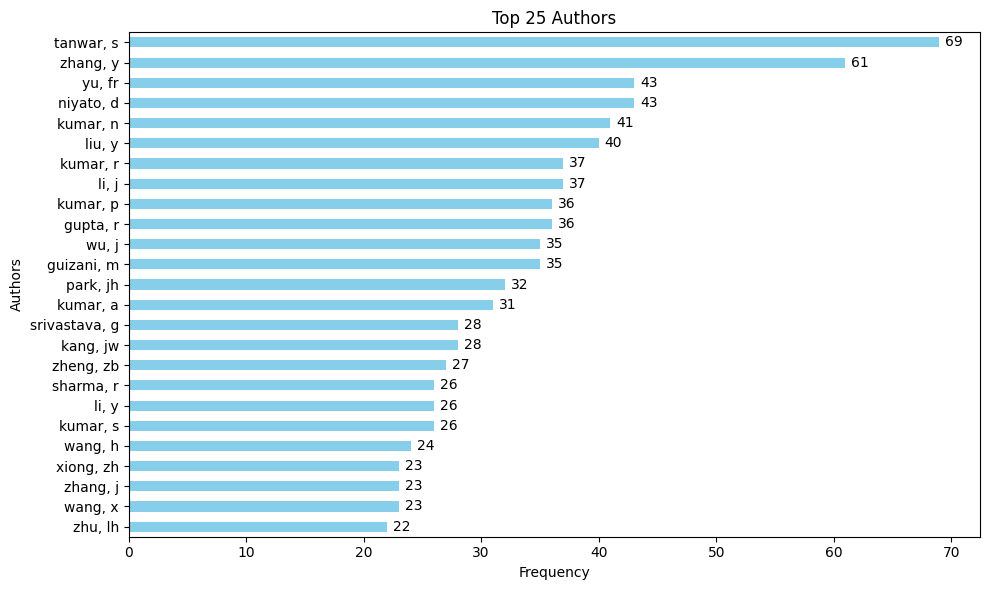

In [4]:
#YAZARLAR
authors = df['Authors'].str.split('; ').explode()

# Yatay √ßubuk grafiƒüi √ßizme
plt.figure(figsize=(10, 6))
data = authors.value_counts().head(25).sort_values()
print(data)

# √áubuk grafiƒüi
ax = data.plot(kind='barh', color='skyblue')

# Barlarƒ±n u√ßlarƒ±na deƒüerleri yazma
for index, value in enumerate(data):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10)

# Ba≈ülƒ±k ve etiketler
plt.title('Top 25 Authors')
plt.xlabel('Frequency')
plt.ylabel('Authors')
plt.tight_layout()

# Grafiƒüi g√∂sterme
plt.show()



              Authors  Times Cited, WoS Core
12642        zhang, y                   4334
7866        niyato, d                   3086
12300          yu, fr                   2401
6815      maharjan, s                   2356
5276         kang, jw                   1797
10652       tanwar, s                   1784
6603           lu, yl                   1727
12552        zhang, k                   1715
11870       xiong, zh                   1708
7779       nguyen, dc                   1671
2795          ding, m                   1661
8420         pham, qv                   1653
4598        huang, xh                   1604
8274    pathirana, pn                   1600
3910       guizani, m                   1565
5803         kumar, r                   1542
12773       zheng, zb                   1512
9615   seneviratne, a                   1478
8492         poor, hv                   1464
6119            li, j                   1328
4437      hossain, ms                   1313
5800      

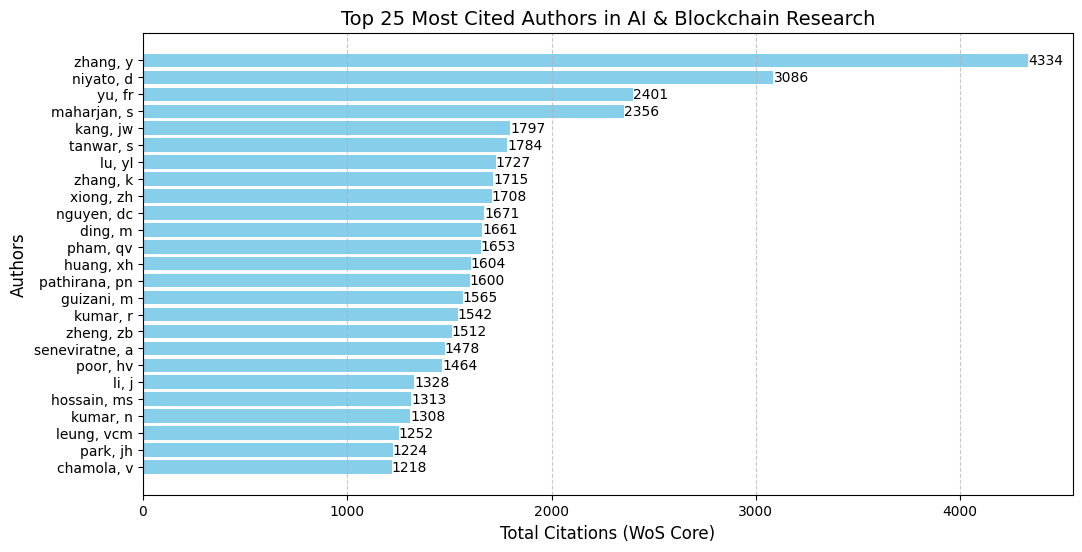

In [5]:
#YAZARLAR VE ATIFLARI
# Authors s√ºtununu '; ' ile ayƒ±r ve her yazarƒ± ayrƒ± satƒ±rlara geni≈ület
authors = df[['Authors', 'Times Cited, WoS Core']].dropna()
authors = authors.assign(Authors=authors['Authors'].str.split('; ')).explode('Authors')

# Yazar bazƒ±nda toplam atƒ±f sayƒ±sƒ±nƒ± hesapla
author_citations = authors.groupby('Authors')['Times Cited, WoS Core'].sum().reset_index()

# En √ßok atƒ±f alan 25 yazarƒ± sƒ±rala
top_cited_authors = author_citations.sort_values(by="Times Cited, WoS Core", ascending=False).head(25)

# Sonu√ßlarƒ± g√∂r√ºnt√ºleme
print(top_cited_authors)

# Authors s√ºtununu '; ' ile ayƒ±r ve her yazarƒ± ayrƒ± satƒ±rlara geni≈ület
authors = df[['Authors', 'Times Cited, WoS Core']].dropna()
authors = authors.assign(Authors=authors['Authors'].str.split('; ')).explode('Authors')

# Yazar bazƒ±nda toplam atƒ±f sayƒ±sƒ±nƒ± hesapla
author_citations = authors.groupby('Authors')['Times Cited, WoS Core'].sum().reset_index()

# En √ßok atƒ±f alan 25 yazarƒ± sƒ±rala
top_cited_authors = author_citations.sort_values(by="Times Cited, WoS Core", ascending=False).head(25)



# Grafik √áizimi
plt.figure(figsize=(12, 6))
bars = plt.barh(top_cited_authors['Authors'], top_cited_authors['Times Cited, WoS Core'], color='skyblue')
plt.xlabel("Total Citations (WoS Core)", fontsize=12)
plt.ylabel("Authors", fontsize=12)
plt.title("Top 25 Most Cited Authors in AI & Blockchain Research", fontsize=14)
plt.gca().invert_yaxis()  # En √ßok atƒ±f alanƒ±n en √ºstte g√∂r√ºnmesini saƒülar
plt.grid(axis='x', linestyle='--', alpha=0.7)

# √áubuklarƒ±n u√ßlarƒ±na atƒ±f sayƒ±sƒ±nƒ± ekleme
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', ha='left', va='center', fontsize=10)

# Grafiƒüi g√∂ster
plt.show()
top_cited_authors.to_csv('top_cited_authors.csv',index=False)

Affiliations
university of technology sydney                                  54
ministry of education & science of ukraine                       55
huazhong university of science & technology                      55
prince sattam bin abdulaziz university                           56
shanghai jiao tong university                                    58
birla institute of technology & science pilani (bits pilani)     58
hong kong polytechnic university                                 58
shenzhen university                                              59
university of petroleum & energy studies (upes)                  61
deakin university                                                62
beijing institute of technology                                  65
sun yat sen university                                           68
indian institute of technology system (iit system)               70
guangdong university of technology                               77
nirma university                   

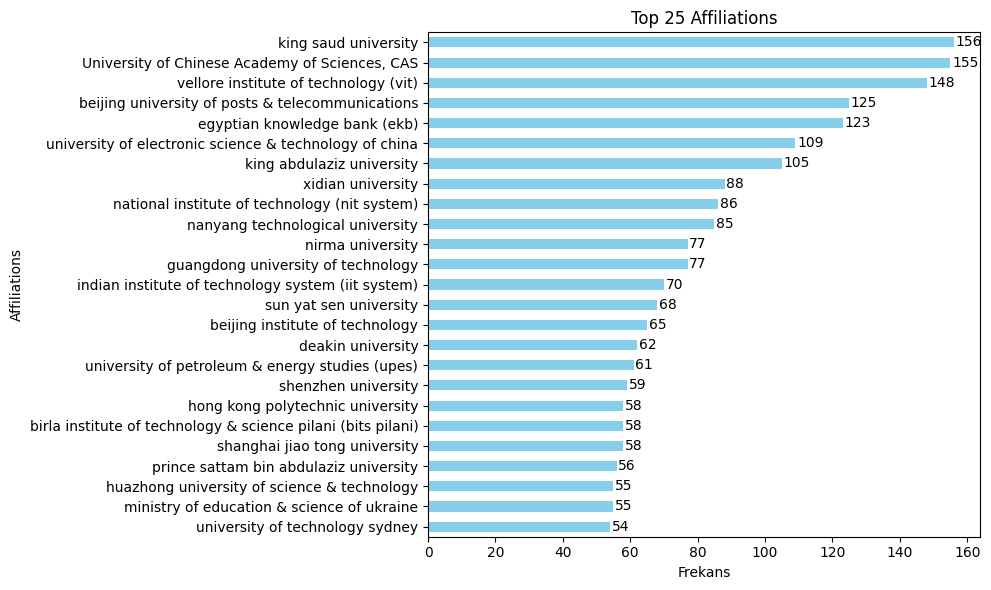

In [6]:
# Affiliation temizleme
affiliations = df['Affiliations'].dropna().str.split('; ').explode()
affiliations = affiliations.str.strip().str.lower()  # Bo≈üluklarƒ± ve k√º√ß√ºk harfleri normalize et

# Mapping tablosu
mapping = {
    "vit vellore": "vellore institute of technology (vit)",
    "chinese academy of sciences, cas": "University of Chinese Academy of Sciences, CAS",
    "chinese academy of sciences": "University of Chinese Academy of Sciences, CAS",
  "University of Chinese Academy of Sciences, CAS" : "University of Chinese Academy of Sciences, CAS"  
 }

# Mapping'i uygula
affiliations = affiliations.replace(mapping)

# Yatay √ßubuk grafiƒüi √ßizme
plt.figure(figsize=(10, 6))
data = affiliations.value_counts().head(25).sort_values()
print(data)
# √áubuk grafiƒüi
ax = data.plot(kind='barh', color='skyblue')

# Barlarƒ±n u√ßlarƒ±na deƒüer yazma
for index, value in enumerate(data):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10)

# Ba≈ülƒ±k ve etiketler
plt.title('Top 25 Affiliations')
plt.xlabel('Frekans')
plt.ylabel('Affiliations')
plt.tight_layout()

# Grafiƒüi g√∂sterme
plt.show()
affiliations.to_csv('top_25_affi.csv',index=False)

                                           Affiliations  Times Cited, WoS Core
2298  university of electronic science & technology ...                   5644
1345                   nanyang technological university                   4938
195    beijing university of posts & telecommunications                   4609
2266     university of chinese academy of sciences, cas                   4103
1097                               king saud university                   4097
2468                                 university of oslo                   3936
439                                   deakin university                   3884
2652              vellore institute of technology (vit)                   3676
648                  guangdong university of technology                   3168
1857                             sun yat sen university                   3104
2230                                 university of bonn                   2981
2444               university of new south wales syd

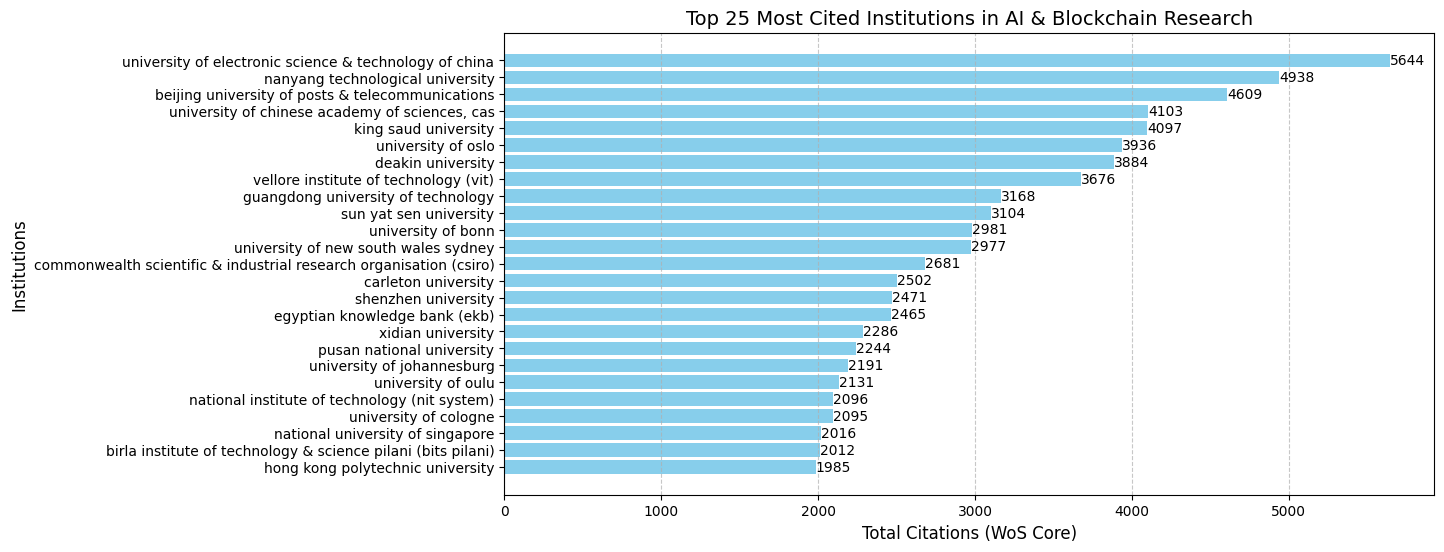

In [7]:

# Affiliations s√ºtununu temizleme ve normalize etme
affiliations = df[['Affiliations', 'Times Cited, WoS Core']].dropna()
affiliations = affiliations.assign(Affiliations=affiliations['Affiliations'].str.split('; ')).explode('Affiliations')
affiliations['Affiliations'] = affiliations['Affiliations'].str.strip().str.lower()  # K√º√ß√ºk harfe √ßevir ve bo≈üluklarƒ± temizle

# Mapping tablosu
mapping = {
    "vit vellore": "vellore institute of technology (vit)",
    "chinese academy of sciences, cas": "university of chinese academy of sciences, cas",
    "chinese academy of sciences": "university of chinese academy of sciences, cas",
    "university of chinese academy of sciences, cas": "university of chinese academy of sciences, cas"
}

# Mapping'i uygula
affiliations['Affiliations'] = affiliations['Affiliations'].replace(mapping)

# Kurum bazƒ±nda toplam atƒ±f sayƒ±sƒ±nƒ± hesapla
affiliation_citations = affiliations.groupby('Affiliations')['Times Cited, WoS Core'].sum().reset_index()

# En √ßok atƒ±f alan 25 kurumu sƒ±rala
top_cited_affiliations = affiliation_citations.sort_values(by="Times Cited, WoS Core", ascending=False).head(25)

# Sonu√ßlarƒ± g√∂r√ºnt√ºleme
print(top_cited_affiliations)

# Grafik √áizimi
plt.figure(figsize=(12, 6))
bars = plt.barh(top_cited_affiliations['Affiliations'], top_cited_affiliations['Times Cited, WoS Core'], color='skyblue')
plt.xlabel("Total Citations (WoS Core)", fontsize=12)
plt.ylabel("Institutions", fontsize=12)
plt.title("Top 25 Most Cited Institutions in AI & Blockchain Research", fontsize=14)
plt.gca().invert_yaxis()  # En √ßok atƒ±f alan kurumun en √ºstte g√∂r√ºnmesini saƒülar
plt.grid(axis='x', linestyle='--', alpha=0.7)

# √áubuklarƒ±n u√ßlarƒ±na atƒ±f sayƒ±sƒ±nƒ± ekleme
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', ha='left', va='center', fontsize=10)

# Grafiƒüi g√∂ster
plt.show()


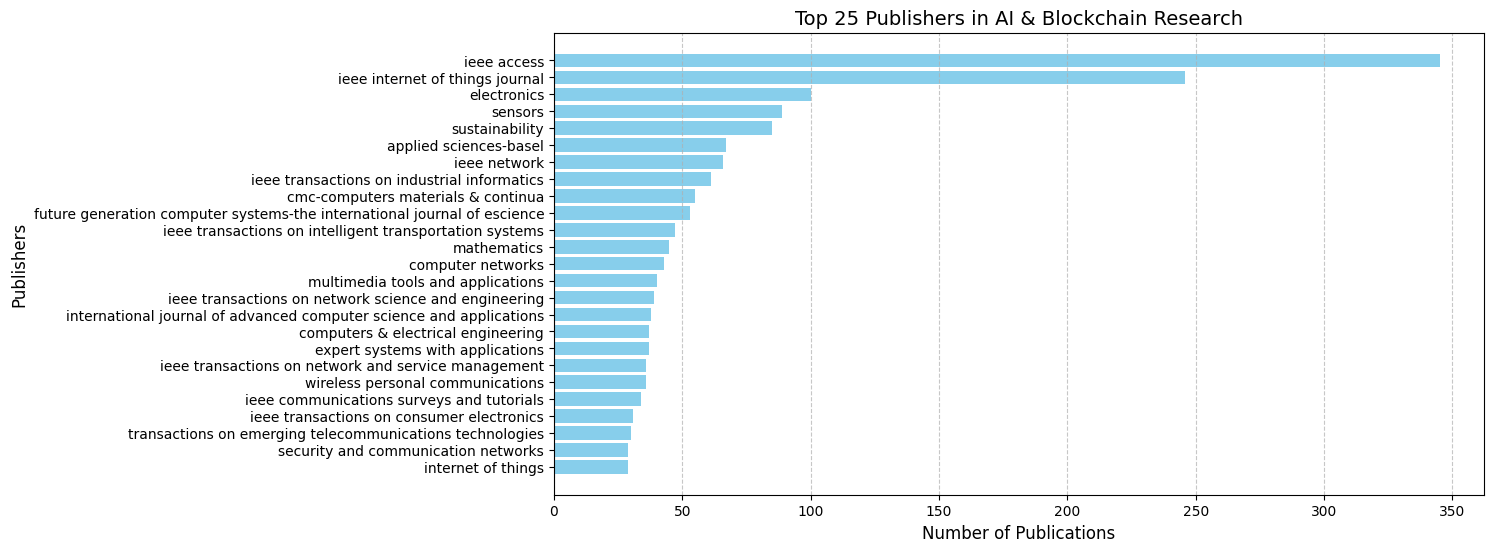

In [8]:

# Publisher isimlerini temizleme ve standardize etme
publisher_map = {
    "ieee-inst electrical electronics engineers inc": "ieee",
    "institute of electrical and electronics engineers inc.": "ieee",
    "multidisciplinary digital publishing institute (mdpi)": "mdpi",
    "elsevier ltd": "elsevier",
    "elsevier b.v.": "elsevier",
    "bmc": "biomed",
    "biomed central ltd": "biomed",
    "elsevier inc.": "elsevier",
    "springer science and business media deutschland gmbh": "springer",
    "frontiers media s.a.": "frontiers media sa",
    "john wiley and sons inc": "wiley",
    "oxford univ press": "oxford university press",
    "sage publications inc.": "sage publications ltd",
    "sage publications inc": "sage publications ltd",
    "jmir publications, inc": "jmir publications inc.",
    "peerj inc": "peerj inc.",
    "ios press": "ios press bv",
    "ieee computer soc": "ieee",
    "john wiley and sons ltd": "wiley",
    "biomed central ltd.": "biomed",
    "mdpi ag": "mdpi",
    "lippincott williams and wilkins": "lippincott williams & wilkins",
    "taylor & francis ltd": "taylor and francis ltd.",
    "ieee computer society": "ieee",
    "wiley-v c h verlag gmbh": "wiley",
    "wiley periodicals, inc": "wiley",
    "elsevier ireland ltd": "elsevier",
    "elsevier sci ltd": "elsevier",
    "springer heidelberg": "springer",
    "springer nature": "springer",
    "wiley-hindawi": "wiley",
    "taylor & francis inc": "taylor and francis ltd."
}

# Publisher s√ºtunundaki t√ºm isimleri deƒüi≈ütirme
df['Source Title'] = df['Source Title'].replace(publisher_map)

# ƒ∞√ßinde belirli yayƒ±ncƒ± isimleri ge√ßen t√ºm verileri standardize etme
df['Source Title'] = df['Source Title'].apply(lambda x: 'elsevier' if isinstance(x, str) and 'elsevier' in x.lower() else x)
df['Source Title'] = df['Source Title'].apply(lambda x: 'springer' if isinstance(x, str) and 'springer' in x.lower() else x)

# Yayƒ±ncƒ± bazƒ±nda makale sayƒ±sƒ±nƒ± hesaplama
publisher_counts = df['Source Title'].value_counts().head(25)

# Grafik √áizimi
plt.figure(figsize=(12, 6))
plt.barh(publisher_counts.index, publisher_counts.values, color='skyblue')
plt.xlabel("Number of Publications", fontsize=12)
plt.ylabel("Publishers", fontsize=12)
plt.title("Top 25 Publishers in AI & Blockchain Research", fontsize=14)
plt.gca().invert_yaxis()  # En √ßok makale yayƒ±mlayan yayƒ±ncƒ±nƒ±n en √ºstte g√∂r√ºnmesini saƒülar
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


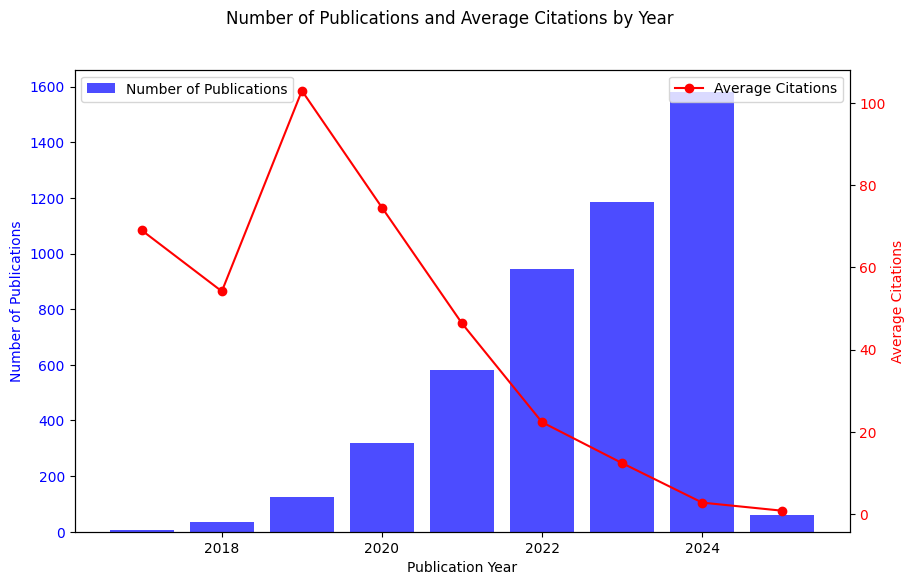

In [9]:
# Yƒ±l bazƒ±nda toplam yayƒ±n sayƒ±sƒ± ve ortalama atƒ±f sayƒ±sƒ±nƒ± hesaplama
publication_count = df.groupby("Publication Year").size()  # Yayƒ±n sayƒ±sƒ±
average_citations = df.groupby("Publication Year")["Times Cited, All Databases"].mean()  # Ortalama atƒ±f

# Grafik √ßizimi
fig, ax1 = plt.subplots(figsize=(10, 6))

# Yayƒ±n sayƒ±sƒ±nƒ± √ßubuk grafik olarak √ßiz
ax1.bar(publication_count.index, publication_count.values, color="blue", alpha=0.7, label="Number of Publications")
ax1.set_xlabel("Publication Year")
ax1.set_ylabel("Number of Publications", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Ortalama atƒ±f sayƒ±sƒ±nƒ± √ßizgi grafik olarak √ßiz
ax2 = ax1.twinx()
ax2.plot(average_citations.index, average_citations.values, color="red", marker="o", label="Average Citations")
ax2.set_ylabel("Average Citations", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Ba≈ülƒ±k ve lejant ekleme
fig.suptitle("Number of Publications and Average Citations by Year")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Grafiƒüi g√∂ster
plt.show()

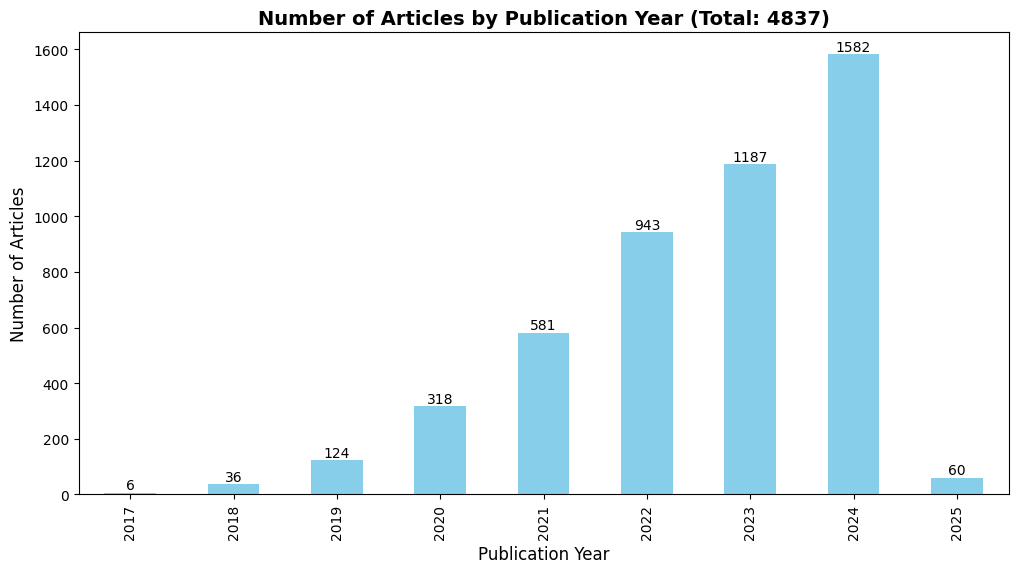

In [10]:
# Toplam makale sayƒ±sƒ±nƒ± hesapla
yearly_publications = df['Publication Year'].value_counts().sort_index()

total_articles = yearly_publications.sum()

# G√∂rselle≈ütirme
plt.figure(figsize=(12, 6))
bars = yearly_publications.plot(kind='bar', color='skyblue')
plt.xlabel("Publication Year", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.title(f"Number of Articles by Publication Year (Total: {total_articles})", fontsize=14, fontweight='bold')

# √áubuklarƒ±n u√ßlarƒ±na deƒüerleri ekleme
for i, value in enumerate(yearly_publications):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


                                          Article Title  Times Cited, WoS Core
4256  building dynamic capabilities for digital tran...                   1169
1670  the impact of digital technology and industry ...                    919
1219  digital twin: enabling technologies, challenge...                    817
869   6g wireless communication systems: application...                    790
1767        the road towards 6g: a comprehensive survey                    714
2572  industry 5.0: a survey on enabling technologie...                    706
2513  blockchain and federated learning for privacy-...                    694
1494  a survey on iot security: application areas, s...                    641
1871  incentive mechanism for reliable federated lea...                    534
2921  federated learning for internet of things: a c...                    532
1066  impact of covid-19 pandemic on information man...                    504
246   on big data, artificial intelligence and smart

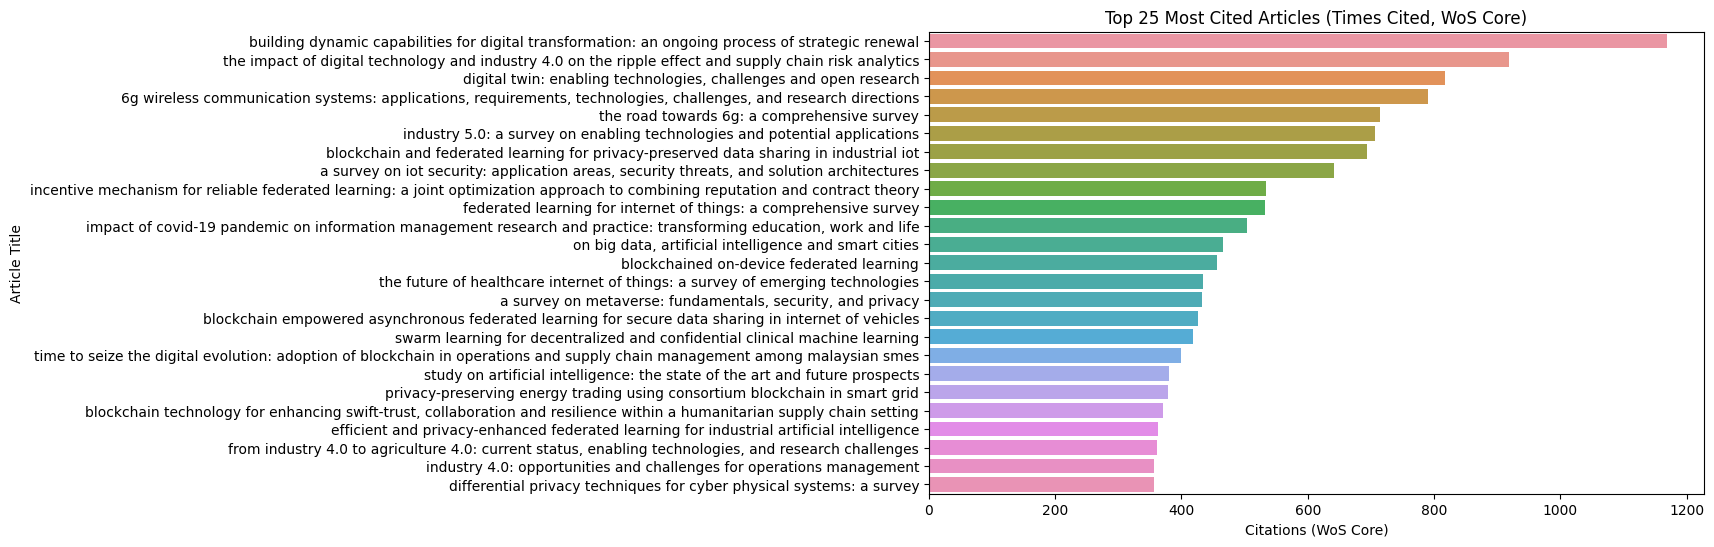

In [11]:
# En √ßok alƒ±ntƒ± alan ilk 25 makale
top_cited = df.nlargest(25, 'Times Cited, WoS Core')[['Article Title', 'Times Cited, WoS Core']]
print(top_cited)

# G√∂rselle≈ütirme
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cited, y='Article Title', x='Times Cited, WoS Core', orient='h')
plt.xlabel("Citations (WoS Core)")
plt.ylabel("Article Title")
plt.title("Top 25 Most Cited Articles (Times Cited, WoS Core)")
plt.show()

                                          Article Title  \
4256  building dynamic capabilities for digital tran...   
1670  the impact of digital technology and industry ...   
1219  digital twin: enabling technologies, challenge...   
869   6g wireless communication systems: application...   
1767        the road towards 6g: a comprehensive survey   
2572  industry 5.0: a survey on enabling technologie...   
2513  blockchain and federated learning for privacy-...   
1494  a survey on iot security: application areas, s...   
1871  incentive mechanism for reliable federated lea...   
2921  federated learning for internet of things: a c...   
1066  impact of covid-19 pandemic on information man...   
246   on big data, artificial intelligence and smart...   
1985          blockchained on-device federated learning   
3182  the future of healthcare internet of things: a...   
4233  a survey on metaverse: fundamentals, security,...   
2514  blockchain empowered asynchronous federated le... 

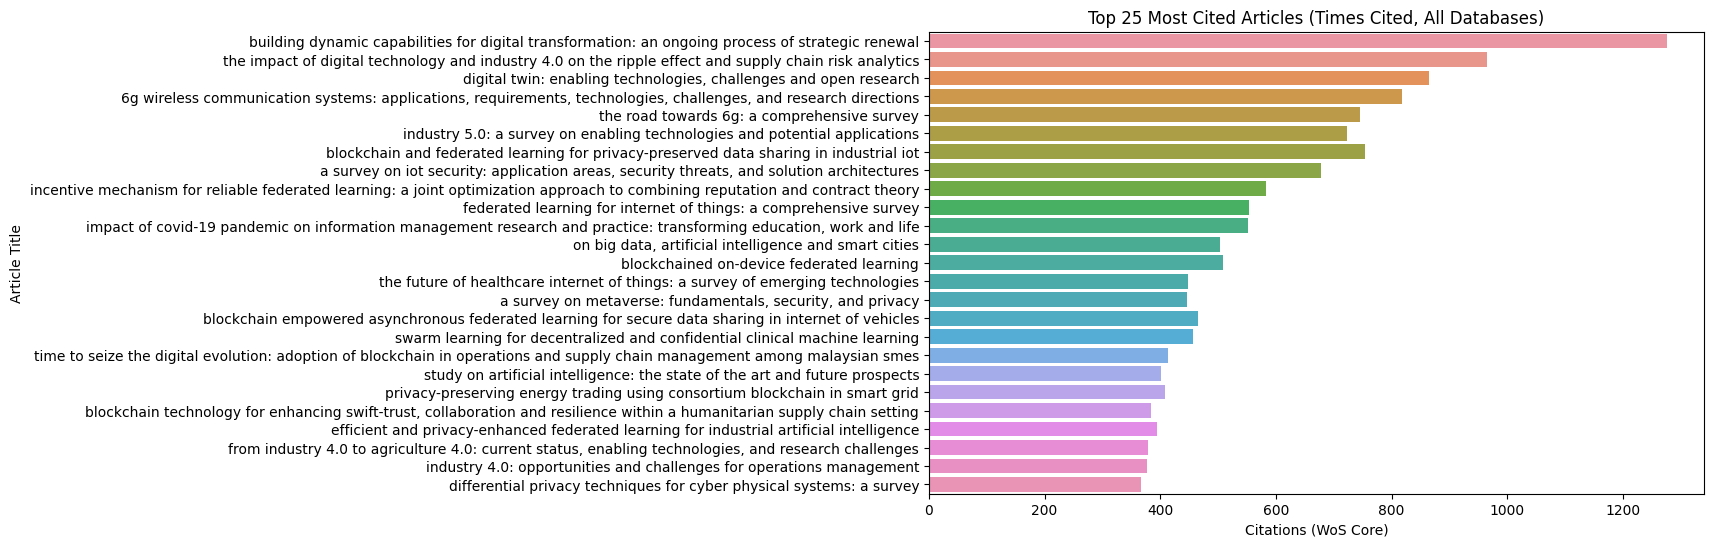

In [12]:
# En √ßok alƒ±ntƒ± alan ilk 25 makale
top_cited = df.nlargest(25, 'Times Cited, WoS Core')[['Article Title', 'Times Cited, All Databases']]
print(top_cited)

# G√∂rselle≈ütirme
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cited, y='Article Title', x='Times Cited, All Databases', orient='h')
plt.xlabel("Citations (WoS Core)")
plt.ylabel("Article Title")
plt.title("Top 25 Most Cited Articles (Times Cited, All Databases)")
plt.show()

                                          Article Title  Cited Reference Count
4256  building dynamic capabilities for digital tran...                    135
1670  the impact of digital technology and industry ...                    104
1219  digital twin: enabling technologies, challenge...                     96
869   6g wireless communication systems: application...                     89
1767        the road towards 6g: a comprehensive survey                    171
2572  industry 5.0: a survey on enabling technologie...                    181
2513  blockchain and federated learning for privacy-...                     29
1494  a survey on iot security: application areas, s...                    184
1871  incentive mechanism for reliable federated lea...                     36
2921  federated learning for internet of things: a c...                    209
1066  impact of covid-19 pandemic on information man...                     92
246   on big data, artificial intelligence and smart

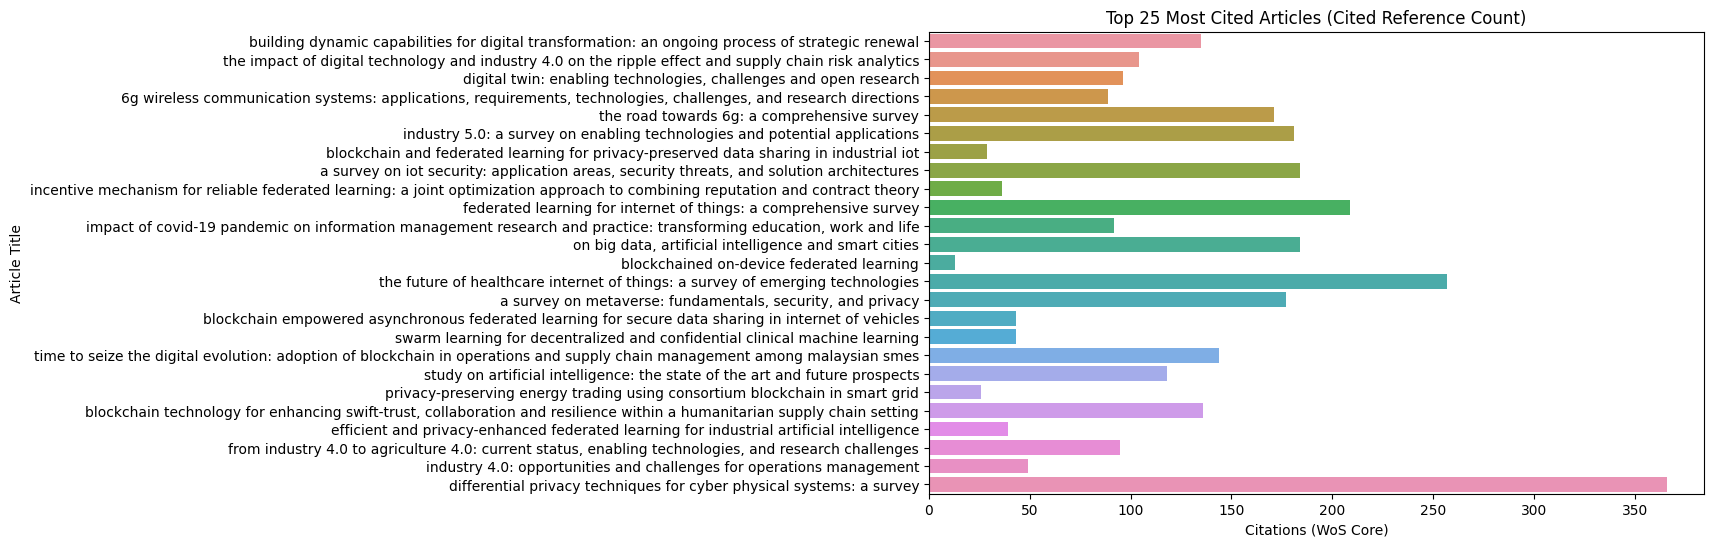

In [13]:
# En √ßok Cited Reference Count alan ilk 25 makale
top_cited = df.nlargest(25, 'Times Cited, WoS Core')[['Article Title', 'Cited Reference Count']]
print(top_cited)

# G√∂rselle≈ütirme
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cited, y='Article Title', x='Cited Reference Count', orient='h')
plt.xlabel("Citations (WoS Core)")
plt.ylabel("Article Title")
plt.title("Top 25 Most Cited Articles (Cited Reference Count)")
plt.show()

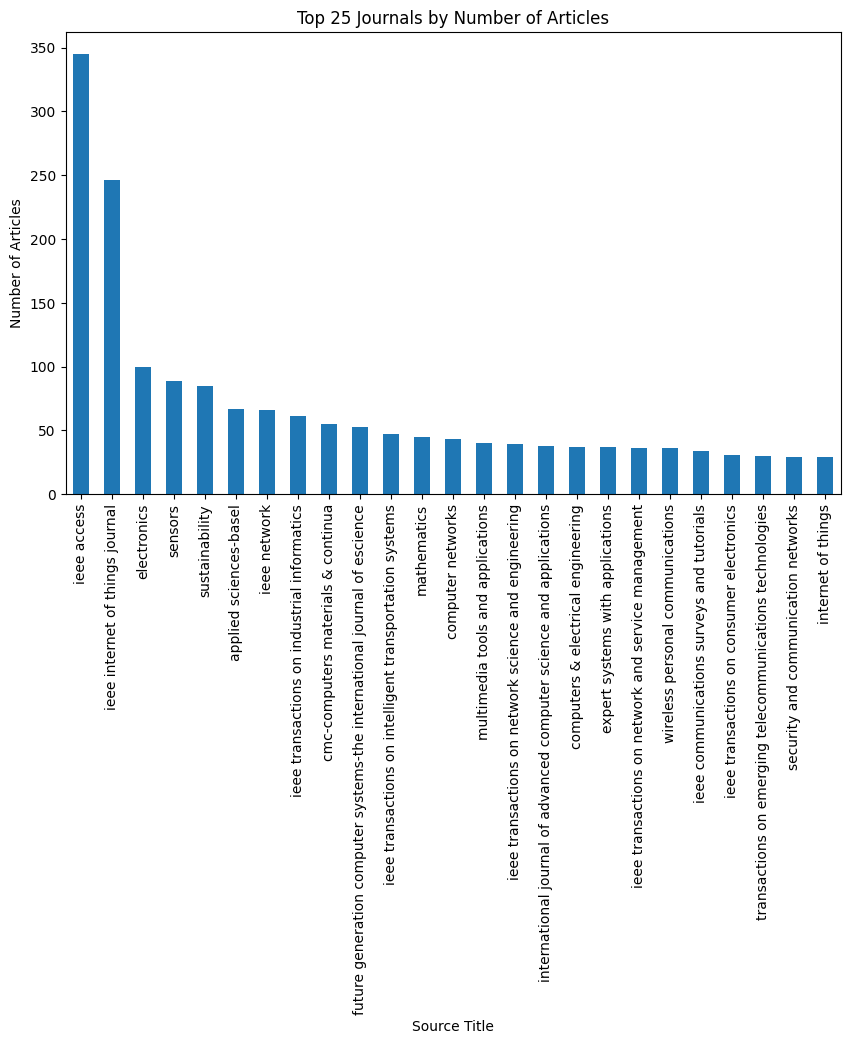

In [14]:
# En √ßok yayƒ±n yapan dergiler
top_journals = df['Source Title'].value_counts().head(25)

# G√∂rselle≈ütirme
plt.figure(figsize=(10, 6))
top_journals.plot(kind='bar')
plt.xlabel("Source Title")
plt.ylabel("Number of Articles")
plt.title("Top 25 Journals by Number of Articles")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


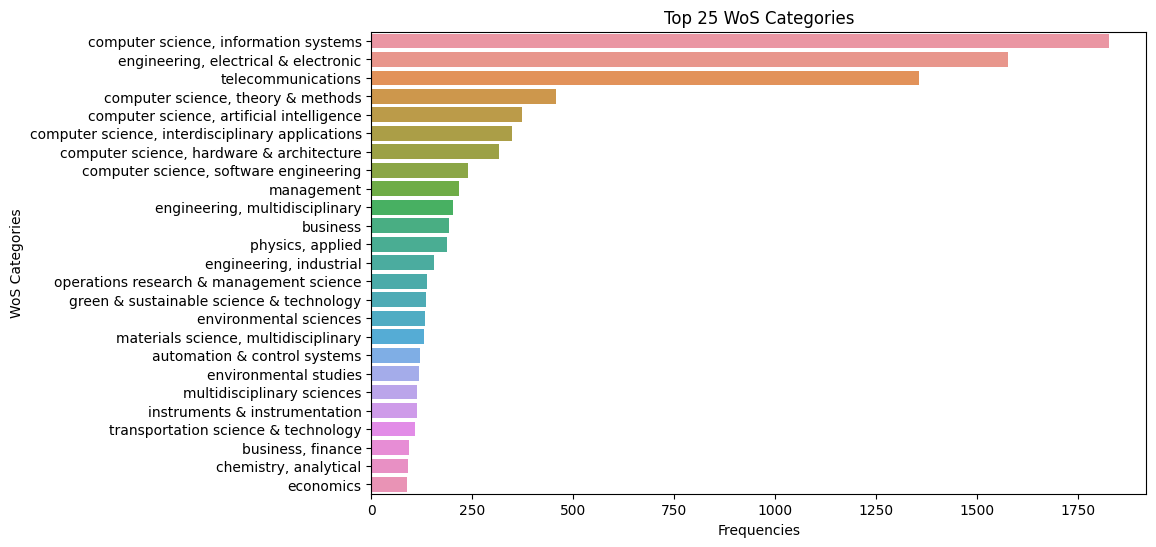

In [15]:
# WoS Categories analiz
categories = df['WoS Categories'].dropna().str.split(";").explode().str.strip()
category_counts = Counter(categories)

# En √ßok ge√ßen 10 kategori
top_categories = category_counts.most_common(25)
categories, counts = zip(*top_categories)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(categories), orient='h')
plt.xlabel("Frequencies")
plt.ylabel("WoS Categories")
plt.title("Top 25 WoS Categories")
plt.show()

In [16]:
# Author Keywords s√ºtunu olup olmadƒ±ƒüƒ±nƒ± kontrol et
if 'Author Keywords' not in df.columns:
    raise KeyError("The 'Author Keywords' column is missing. Check the dataset column names.")

# Eksik veya NaN deƒüerleri bo≈ü string olarak deƒüi≈ütir
df['Author Keywords'] = df['Author Keywords'].astype(str).fillna('')

# Anahtar kelime listesindeki her bir kelimeyi d√∂n√º≈ü√ºm haritasƒ±na g√∂re temizleyen fonksiyon
def clean_keywords(keyword_list, mapping):
    cleaned_keywords = []
    for keyword in keyword_list:
        keyword = keyword.strip().lower()  # K√º√ß√ºk harfe √ßevir ve bo≈üluklarƒ± kaldƒ±r
        keyword = mapping.get(keyword, keyword)  # Haritada varsa deƒüi≈ütir, yoksa olduƒüu gibi bƒ±rak
        if keyword not in ["nan", "0", ""]:  # Gereksiz deƒüerleri √ßƒ±kar
            cleaned_keywords.append(keyword)
    return cleaned_keywords

# Anahtar kelimeler i√ßin d√∂n√º≈ü√ºm haritasƒ±
keyword_mapping = {
    "ai": "artificial intelligence",
    "artificial intelligence (ai)":"artificial intelligence",
    "iot": "internet of things",
    "explainable ai": "explainable artificial intelligence",
    "internet of things (iot)": "internet of things",
    "deep learning (dl)": "deep learning",
    "blockchains": "blockchain",
    "blockchain technology": "blockchain",
    "ml": "machine learning",
    "dl": "deep learning",
    "cnn": "convolutional neural network",
    "svm": "support vector machine",
    "nlp": "natural language processing",
    "industry 4": "industry 4.0",
    "covid-19": "covid 19",
    "6g": "6g networks",
    "5g": "5g networks",
    "smart contracts": "smart contract",
    "metaverse": "metaverse technology",
    "privacy": "data privacy",
    "federated learning": "federated ai",
    "edge computing": "cloud-edge computing",
    "cloud computing": "cloud-edge computing"
}

# Author Keywords s√ºtununu temizleme ve analiz
author_keywords_cleaned = (
    df['Author Keywords']
    .str.lower()  # K√º√ß√ºk harfe √ßevir
    .str.split(';')  # Noktalƒ± virg√ºllerle ayrƒ±lmƒ±≈ü kelimeleri listeye d√∂n√º≈üt√ºr
    .apply(lambda keywords: clean_keywords(keywords, keyword_mapping))  # D√∂n√º≈ü√ºm haritasƒ±nƒ± uygula
    .explode()  # Listeleri tek tek elemanlarƒ±na ayƒ±r
    .str.strip()  # Fazladan bo≈üluklarƒ± temizle
)

# En sƒ±k ge√ßen ilk 50 anahtar kelimeyi bul
top_keywords = Counter(author_keywords_cleaned).most_common(50)

# Sonu√ßlarƒ± g√∂r√ºnt√ºleme
print(pd.DataFrame(top_keywords, columns=['Keyword', 'Count']))


                                 Keyword  Count
0                             blockchain   3147
1                     internet of things    890
2                artificial intelligence    849
3                       machine learning    671
4                           federated ai    594
5                               security    574
6                         smart contract    455
7                          deep learning    453
8                           data privacy    450
9                   cloud-edge computing    387
10                           data models    228
11                               servers    202
12                              training    189
13                computational modeling    169
14                          industry 4.0    154
15                              big data    147
16                         task analysis    124
17                reinforcement learning    116
18                              covid 19    112
19                              ethereum

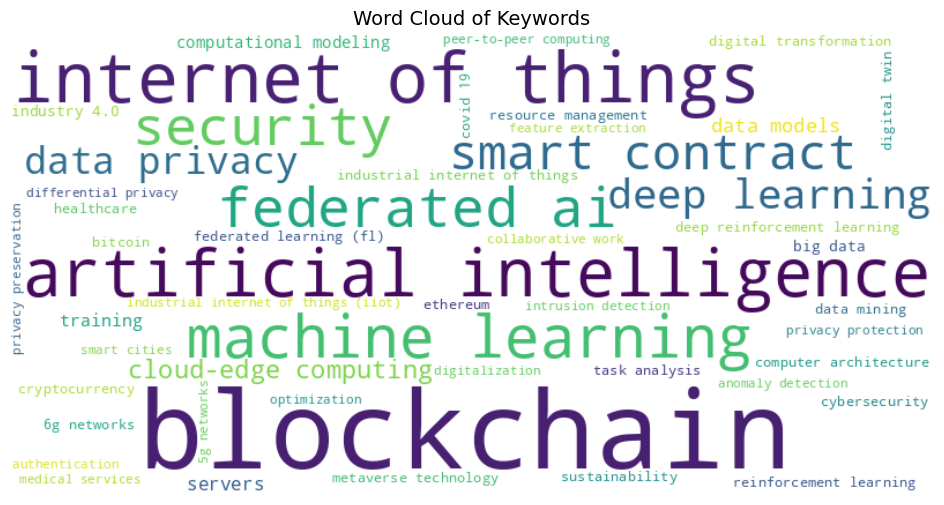

In [17]:


# En sƒ±k ge√ßen ilk 50 anahtar kelimeyi bul
top_keywords = Counter(author_keywords_cleaned)

word_freq_dict = dict(top_keywords)  # WordCloud i√ßin frekans s√∂zl√ºƒü√º

# ---- **√áOK RENKLƒ∞ Kelime Bulutu (Word Cloud) Olu≈üturma** ----
wordcloud = WordCloud(
    width=800, height=400,
    background_color="white",  # Arka plan rengi beyaz
    colormap="viridis",  # **√áok renkli kelime bulutu**
    max_words=50,  # En sƒ±k ge√ßen 50 kelimeyi kullan
    contour_color="black",  # Kelimelerin etrafƒ±nda siyah kontur
    random_state=42  # Rastgele renk daƒüƒ±lƒ±mƒ± i√ßin sabit deƒüer
).generate_from_frequencies(word_freq_dict)

# Kelime bulutunu g√∂rselle≈ütir
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Eksenleri kapat
plt.title("Word Cloud of Keywords", fontsize=14)
plt.show()


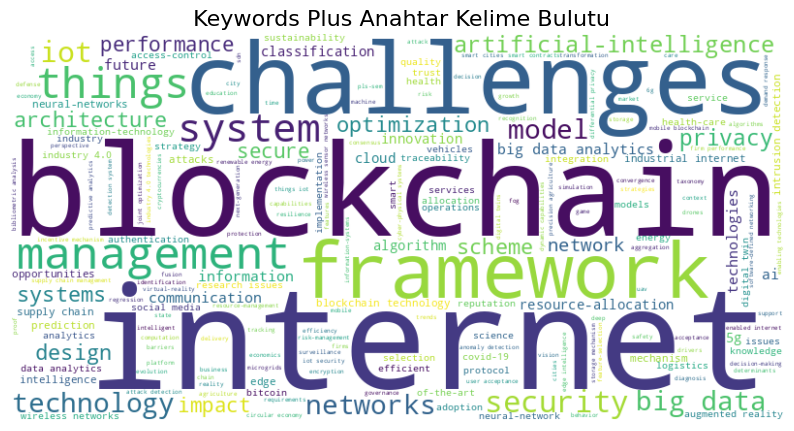

In [18]:
# Create keyword distribution
keyword_dist = df['Keywords Plus'].dropna().str.split(";").explode().str.strip()
keyword_dist_counts = Counter(keyword_dist)

# Kelime bulutu olu≈üturma
wordcloud = WordCloud(
    background_color="white",  # Arka plan rengi
    width=800,  # Geni≈ülik
    height=400,  # Y√ºkseklik
    colormap='viridis'  # Renk paleti
).generate_from_frequencies(keyword_dist_counts)

# Kelime bulutunu √ßizdirme
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Eksenleri kapatma
plt.title(" Keywords Plus Anahtar Kelime Bulutu", fontsize=16)
plt.show()

In [19]:
#ADRES KOLONUNUN HAZIRLANMASI
import re  # re mod√ºl√ºn√º burada import ediyoruz

# Define a function to remove content within square brackets and extract countries based on semicolons
def extract_countries_ignore_brackets(address):
    if pd.isnull(address):
        return None
    # Remove content inside square brackets along with the brackets
    cleaned_address = re.sub(r'\[.*?\]', '', address)
    # Split by semicolon and extract countries (last part after commas in each segment)
    parts = cleaned_address.split(';')
    countries = [part.split(',')[-1].strip() for part in parts if ',' in part]
    return countries if countries else None

# Apply the function to extract countries while ignoring semicolons inside brackets
df['Countries'] = df['Addresses'].apply(extract_countries_ignore_brackets)

# Display the updated DataFrame to confirm the changes
print(df[['Addresses', 'Countries']].head())

                                           Addresses  \
0  [aamer, ammar; zadeh, adel; mali, prithvi] nor...   
1  [abaoud, mohammed] imam mohammad ibn saud isla...   
2  [abbas, alhamzah f.] univ teknol malaysia utm,...   
3  [abbas, khizar; afaq, muhammad; khan, talha ah...   
4  [abbas, syed m. aqleem] shaheed zulfikar ali b...   

                                           Countries  
0                                   [canada, ma usa]  
1         [saudi arabia, saudi arabia, saudi arabia]  
2  [malaysia, pakistan, malaysia, pakistan, pakis...  
3                                      [south korea]  
4  [pakistan, pakistan, pakistan, saudi arabia, s...  


In [20]:
#√úLKELER BELƒ∞RLE
from collections import Counter

# Varsayƒ±yoruz ki `df` DataFrame'iniz hali hazƒ±rda y√ºkl√º ve 'Countries' s√ºtunu mevcut

# Create a set of unique countries per row, then flatten for the final count
unique_countries_per_row = df['Countries'].dropna().apply(set)  # Ensure uniqueness within each row
all_countries = [country for row in unique_countries_per_row for country in row]

# Count the occurrences of each country
country_counts = Counter(all_countries)

# Convert the counts to a DataFrame for better readability
country_counts_df = pd.DataFrame.from_dict(country_counts, orient='index', columns=['Count']).reset_index()
country_counts_df.rename(columns={'index': 'Country'}, inplace=True)

# Sort by count in descending order
country_counts_df = country_counts_df.sort_values(by='Count', ascending=False)

# Display the result
print(country_counts_df.head(50))


             Country  Count
19   peoples r china   1770
24             india    925
2       saudi arabia    494
8            england    371
5        south korea    339
10         australia    320
1             canada    301
3           pakistan    202
35             italy    172
20   u arab emirates    164
90            taiwan    152
12            france    122
4           malaysia    119
107        singapore    116
57             spain    114
50           germany    109
37             japan    103
7              egypt     96
9             norway     85
61              iran     77
52           finland     73
108          romania     69
13             qatar     67
36           turkiye     64
65      south africa     63
56            greece     60
16           lebanon     58
46            russia     58
23        bangladesh     57
51           ireland     57
18              iraq     53
21            sweden     52
6           scotland     48
40            poland     47
54          portugal

In [21]:
# Define a function to normalize country names
def normalize_country_names(countries):
    normalized = []
    for country in countries:
        country = country.strip().lower()  # K√º√ß√ºk harfe √ßevir ve bo≈üluklarƒ± temizle
        if 'usa' in country or 'united states' in country:
            normalized.append('USA')  # T√ºm USA varyasyonlarƒ±nƒ± normalize et
        elif 'peoples r china' in country or 'china' in country:
            normalized.append('China')  # √áin i√ßin normalize
        elif 'india' in country:
            normalized.append('India')  # Hindistan i√ßin normalize
        elif 'england' in country or 'uk' in country or 'united kingdom' in country:
            normalized.append('England')  # ƒ∞ngiltere i√ßin normalize
        elif 'turkey' in country or 't√ºrkiye' in country:
            normalized.append('Turkey')  # T√ºrkiye i√ßin normalize
        else:
            normalized.append(country.title())  # Diƒüer √ºlkeleri ba≈ü harflerini b√ºy√ºterek ekle
    return set(normalized)  # Aynƒ± satƒ±rda tekrarlananlarƒ± kaldƒ±r

# Apply normalization to the 'Countries' column
df['Normalized_Countries'] = df['Countries'].dropna().apply(normalize_country_names)

# Flatten the list of normalized countries and count occurrences
all_countries = [country for row in df['Normalized_Countries'].dropna() for country in row]
country_counts = Counter(all_countries)

# Convert the counts to a DataFrame
country_counts_df = pd.DataFrame.from_dict(country_counts, orient='index', columns=['Count']).reset_index()
country_counts_df.rename(columns={'index': 'Country'}, inplace=True)

# Sort by count in descending order
country_counts_df = country_counts_df.sort_values(by='Count', ascending=False)

# Display the result
print(country_counts_df)

# (Optional) Save to CSV if needed
country_counts_df.to_csv('normalized_country_counts.csv', index=False)




          Country  Count
17          China   1770
23          India    925
1             USA    625
2    Saudi Arabia    494
8         England    410
..            ...    ...
73          Sudan      1
93     Montenegro      1
102      Dominica      1
94         Guyana      1
117      Anguilla      1

[118 rows x 2 columns]


<ipython-input-22-e09c318a92d2>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


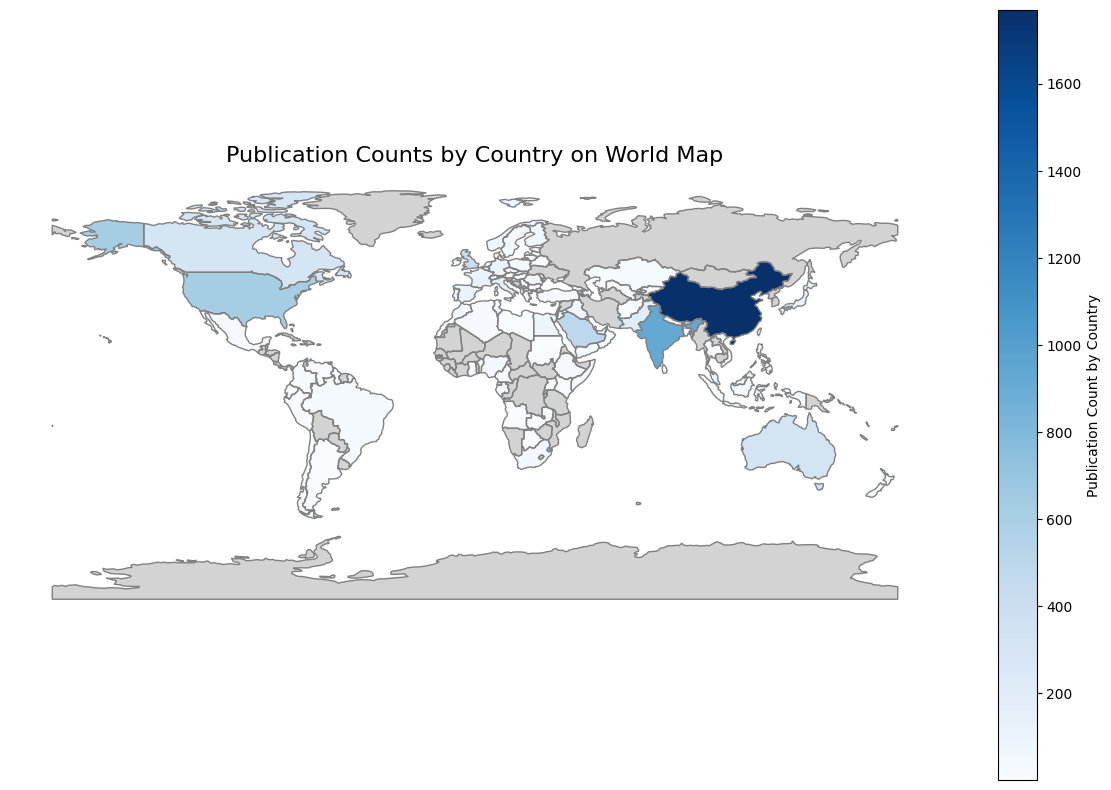

Country  Count
0                        China   1770
1                        India    925
2     United States of America    625
3                 Saudi Arabia    494
4               United Kingdom    410
5            Republic of Korea    339
6                    Australia    320
7                       Canada    301
8                     Pakistan    202
9                        Italy    172
10        United Arab Emirates    164
11                      Taiwan    152
12                      France    122
13                    Malaysia    119
14                   Singapore    116
15                       Spain    114
16                     Germany    109
17                       Japan    103
18                       Egypt     96
19                      Norway     85
20  Iran (Islamic Republic of)     77
21                     Finland     73
22                     Romania     69
23                       Qatar     67
24                      Turkey     64
25                South Africa     63
26                      Greece     60
27          Russian Federation     58
28                     Lebanon     58
29                     Ireland     57
30                  Bangladesh     57
31                        Iraq     53
32                      Sweden     52
33                    Scotland     48
34                      Poland     47
35                    Portugal     46
36                     Tunisia     44
37                     Vietnam     44
38                 Netherlands     42
39                      Jordan     40
40                     Nigeria     38
41                     Morocco     36
42                 Switzerland     35
43                      Brazil     33
44                   Indonesia     30
45                     Denmark     28
46                      Mexico     28
47                      Turkey     27
48                       Wales     27
49                     Czechia     26

In [22]:
import geopandas as gpd


# Harita veri setini y√ºkle
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Normalle≈ütirilmi≈ü √ºlke yayƒ±n sayƒ±sƒ± verisini y√ºkle
df = pd.read_csv('/kaggle/working/normalized_country_counts.csv')

# Manuel e≈üle≈ütirme s√∂zl√ºƒü√º
manual_mapping = {
    "USA": "United States of America",
    "China": "China",
    "India": "India",
    "England": "United Kingdom",
    "Saudi Arabia": "Saudi Arabia",
    "Russia": "Russian Federation",
    "South Korea": "Republic of Korea",
    "Iran": "Iran (Islamic Republic of)",
    "Turkiye": "Turkey",
    "Republic of Korea": "South Korea",
    "Iran (Islamic Republic of)": "Iran",
    "Czech Republic": "Czechia",
    "U Arab Emirates":"United Arab Emirates"
    # Diƒüer e≈üle≈ümeleri buraya ekleyin
}

# Uyumsuz isimleri e≈üle
df['Country'] = df['Country'].replace(manual_mapping)

# Harita ile veriyi birle≈ütirme (√ºlke isimlerine g√∂re)
merged_world = world.merge(df, how="left", left_on="name", right_on="Country")

# Harita √áizimi
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1, color="gray")  # √úlke sƒ±nƒ±rlarƒ±
merged_world.plot(column="Count",  # Frekansa g√∂re renklendirme
                  ax=ax, 
                  cmap="Blues", 
                  legend=True, 
                  legend_kwds={'label': "Publication Count by Country"},
                  missing_kwds={"color": "lightgrey", "label": "No Data"})  # Eksik veriler

# Harita ba≈ülƒ±ƒüƒ± ve eksen ayarlarƒ±
plt.title("Publication Counts by Country on World Map", fontsize=16)
plt.axis("off")  # Eksenleri kapatma
plt.show()
df.head(50)

In [23]:
# 1. TREN ANALƒ∞Zƒ∞ ƒ∞√áƒ∞N TEKRAR Dosyanƒ±n Okunmasƒ±
df = pd.read_excel("/kaggle/input/blockyeni/savedrecs.xls")
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
# Tekrar eksik deƒüerleri kontrol et
df.isnull().sum()

<ipython-input-23-f993b265da72>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda s: s.lower() if type(s) == str else s)


Publication Type            0
Authors                     0
Book Authors             4827
Book Editors             4789
Book Group Authors       4837
                         ... 
Highly Cited Status      4837
Hot Paper Status         4837
Date of Export              0
UT (Unique WOS ID)          0
Web of Science Record       0
Length: 72, dtype: int64

In [24]:
print(df.columns)

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

In [25]:
print(df['Publication Year'].unique())  # Yƒ±llarƒ±n listesini g√∂r
print(df['Publication Year'].dtype)     # Veri tipini kontrol et
print(df['Publication Year'].unique())  # Yƒ±llarƒ±n listesi
print(df['Publication Year'].value_counts().sort_index())  # Yƒ±llara g√∂re makale sayƒ±sƒ±



[2024 2023 2022 2020 2021 2025 2019 2018 2017]
int64
[2024 2023 2022 2020 2021 2025 2019 2018 2017]
Publication Year
2017       6
2018      36
2019     124
2020     318
2021     581
2022     943
2023    1187
2024    1582
2025      60
Name: count, dtype: int64


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<ipython-input-26-92981fe5c166>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Publication Date'] = pd.to_datetime(df['Publication Date'], errors='coerce').dt.year


Publication Date
2020.0      115
2021.0      795
2022.0     2134
2023.0     7504
2024.0    15078
Name: count, dtype: int64


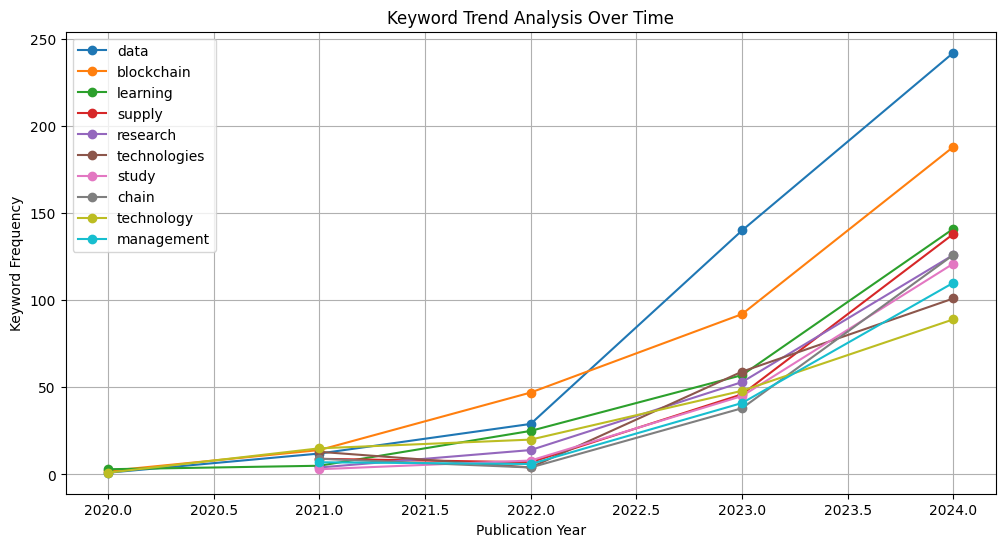

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# NLTK indirme i≈ülemleri (Eƒüer internet baƒülantƒ±sƒ± varsa)
nltk.download('punkt')
nltk.download('stopwords')



# Yƒ±llarƒ± datetime formatƒ±na √ßevir
df['Publication Date'] = pd.to_datetime(df['Publication Date'], errors='coerce').dt.year

# Gerekli kolonlarƒ± temizleyelim
df = df.dropna(subset=['Publication Date', 'Article Title', 'Author Keywords', 'Keywords Plus', 'Abstract'])

# Stopwords listesini alalƒ±m
stop_words = set(stopwords.words('english'))

# Anahtar kelimeleri √ßƒ±kartalƒ±m
def extract_keywords(text):
    words = word_tokenize(str(text).lower())  # Tokenization
    return [word for word in words if word.isalpha() and word not in stop_words]  # Harf olmayanlarƒ± ve stopwords √ßƒ±kar

# T√ºm anahtar kelimeleri birle≈ütirerek tokenize edelim
df['tokens'] = df['Article Title'].apply(extract_keywords) + \
               df['Author Keywords'].apply(extract_keywords) + \
               df['Keywords Plus'].apply(extract_keywords) + \
               df['Abstract'].apply(extract_keywords)

# Anahtar kelimeleri yƒ±llara g√∂re gruplandƒ±r
keywords_by_year = df.explode('tokens').groupby(['Publication Date', 'tokens']).size().reset_index(name='count')

# En √ßok ge√ßen 10 kelimeyi bulalƒ±m
top_keywords = keywords_by_year.groupby('tokens')['count'].sum().sort_values(ascending=False).head(10).index

# Sadece en pop√ºler kelimeleri i√ßeren veriyi filtreleyelim
filtered_keywords = keywords_by_year[keywords_by_year['tokens'].isin(top_keywords)]

# **5. Yƒ±l bazƒ±nda anahtar kelime daƒüƒ±lƒ±mƒ±nƒ± g√∂ster**
print(keywords_by_year.groupby('Publication Date')['count'].sum())

# Grafiƒüi √ßizelim
plt.figure(figsize=(12, 6))
for keyword in top_keywords:
    data = filtered_keywords[filtered_keywords['tokens'] == keyword]
    plt.plot(data['Publication Date'], data['count'], marker='o', label=keyword)

plt.xlabel("Publication Year")
plt.ylabel("Keyword Frequency")
plt.title("Keyword Trend Analysis Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [27]:


print(top_keywords)
print(df.shape)  # (satƒ±r sayƒ±sƒ±, s√ºtun sayƒ±sƒ±)


Index(['data', 'blockchain', 'learning', 'supply', 'research', 'technologies',
       'study', 'chain', 'technology', 'management'],
      dtype='object', name='tokens')
(147, 73)


1Ô∏è‚É£ Genel Eƒüilimler
Anahtar kelimelerin neredeyse hepsi 2022‚Äôden sonra b√ºy√ºk bir artƒ±≈ü g√∂stermi≈ü.
2020 ve 2021 yƒ±llarƒ±nda frekans √ßok d√º≈ü√ºk.
2022 yƒ±lƒ±na kadar bazƒ± kelimeler hi√ß g√∂r√ºnmezken, bu tarihten sonra ciddi bir y√ºkseli≈ü var.
2023 ve 2024 yƒ±llarƒ±nda artƒ±≈ü eƒüilimi devam ediyor.
2Ô∏è‚É£ √ñne √áƒ±kan Anahtar Kelimeler
Kelime	Eƒüilim
data	En √ßok y√ºkselen kelime. 2023‚Äôten sonra √ßok hƒ±zlƒ± bir artƒ±≈ü var.
blockchain	ƒ∞kinci en hƒ±zlƒ± y√ºkselen kelime. 2021‚Äôden sonra keskin bir artƒ±≈ü g√∂stermi≈ü.
learning	2022‚Äôden itibaren s√ºrekli y√ºkseli≈üte.
supply	√ñzellikle 2023 sonrasƒ± artƒ±≈ü var. ‚ÄúSupply Chain‚Äù kavramƒ±nƒ±n pop√ºlerle≈ütiƒüini g√∂steriyor.
research	2022‚Äôden itibaren d√ºzenli bir artƒ±≈ü eƒüilimi var.
technologies	Daha stabil ama yukarƒ± y√∂nl√º bir eƒüilim g√∂steriyor.
study	2023 sonrasƒ±nda belirgin artƒ±≈ü g√∂stermi≈ü.
chain	Muhtemelen "supply chain" terimiyle baƒülantƒ±lƒ± olarak y√ºkseliyor.
technology	Genel olarak istikrarlƒ± bir y√ºkseli≈ü var.
management	2023 sonrasƒ± hƒ±zlanmƒ±≈ü.
üìå √ñne √ßƒ±kan iki ana trend:

"Data" ve "Blockchain" ‚Üí 2023‚Äôten sonra patlama yapmƒ±≈ü.
"Supply Chain", "Technology", "Management" gibi kelimeler daha d√ºzenli artƒ±≈ü g√∂steriyor.


üìå SONU√áLAR VE ANALƒ∞Z
1Ô∏è‚É£ "Data" ve "Blockchain" 2023‚Äôten sonra en hƒ±zlƒ± y√ºkselen iki anahtar kelime.
2Ô∏è‚É£ "Supply Chain", "Technology", "Management" gibi kelimeler d√ºzenli artƒ±≈üta.
3Ô∏è‚É£ 2020-2021 yƒ±llarƒ±nda makale sayƒ±sƒ± d√º≈ü√ºk olduƒüu i√ßin trend analizi zayƒ±f kalƒ±yor.
4Ô∏è‚É£ 2022 sonrasƒ± √∂zellikle "AI", "Blockchain" ve "Supply Chain" gibi konular b√ºy√ºk y√ºkseli≈ü g√∂steriyor.
5Ô∏è‚É£ Eƒüer 2025 yƒ±lƒ± i√ßin de veri eklenirse, bu trendin nasƒ±l devam ettiƒüini daha net g√∂rebiliriz.

In [28]:
df[df['Publication Year'] >= 2022]['Author Keywords'].value_counts().head(20)


Author Keywords
project management; principle-based project; ai; iot; big data and analytics; blockchain; digital twin; emerging technologies; m1                                                                                               1
industries; metaverse; manufacturing industries; green products; production; smart manufacturing; raw materials; cyber-physical systems (cpss); cyber-physical-social systems (cpsss); process industry; smart manufacturing    1
data-driven technologies; healthcare data management; industry 4; 0; internet of things; ethical issues; covid-19 pandemic                                                                                                      1
supply chain; supply chain risk management; projects; construction; stakeholders; construction supply chain risks                                                                                                               1
public distribution system; blockchain innovation; deep learning; ethereum; digi

üìå 2022 ve Sonrasƒ± En Pop√ºler Anahtar Kelimelerin Yorumlanmasƒ±
üìä En √ßok ge√ßen 20 anahtar kelimeyi incelediƒüimizde, birka√ß √∂nemli trend ortaya √ßƒ±kƒ±yor:

1Ô∏è‚É£ Anahtar Trendler
üîπ Yapay Zeka (AI) ve B√ºy√ºk Veri (Big Data)

AI, Deep Learning, Explainable AI (XAI), Federated Learning gibi kavramlar bir√ßok ara≈ütƒ±rmada ge√ßiyor.
B√ºy√ºk veri analitiƒüi (Big Data and Analytics) ve veri g√ºvenliƒüi √∂nemli ara≈ütƒ±rma konularƒ±.
√ñzellikle saƒülƒ±k sekt√∂r√º i√ßin AI ve Deep Learning'in √∂n plana √ßƒ±ktƒ±ƒüƒ± g√∂r√ºl√ºyor.
üîπ Blockchain ve Dijital D√∂n√º≈ü√ºm

Blockchain bir√ßok farklƒ± alanda kullanƒ±lƒ±yor:
Finans (Fintech, Credit Risk, Digital Finance)
Tedarik Zinciri (Supply Chain, Smart Manufacturing, ISM-MICMAC, Industry 4.0)
Saƒülƒ±k (Medical-Event Analysis, Privacy & Security in Medical Data, Cyber Blockchain, Cloud Module, Image Encryption)
Blockchain'in "Ethereum", "Smart Contracts" gibi terimlerle ili≈ükili olduƒüu g√∂r√ºl√ºyor.
üîπ End√ºstri 4.0 ve 5.0

Industry 4.0 ve Industry 5.0 kavramlarƒ± ara≈ütƒ±rmalarda yaygƒ±n olarak yer alƒ±yor.
ƒ∞leri √ºretim teknolojileri (Smart Manufacturing, Cyber-Physical Systems - CPS, Digital Twin) ile ilgili √ßalƒ±≈ümalar artmƒ±≈ü.
End√ºstri 5.0'ƒ±n "people-centric" yani insan merkezli olmasƒ± vurgulanƒ±yor.
üîπ Tedarik Zinciri ve Y√∂netim Konularƒ±

Supply Chain Management, Risk Management ve Project Management konularƒ± sƒ±k√ßa √ßalƒ±≈üƒ±lmƒ±≈ü.
Ye≈üil √ºretim (Green Products, Sustainability) ve s√ºrd√ºr√ºlebilirlik trendi dikkat √ßekiyor.
üîπ Saƒülƒ±k ve Siber G√ºvenlik

COVID-19 sonrasƒ± saƒülƒ±kla ilgili AI ve Deep Learning uygulamalarƒ± artmƒ±≈ü.
"Medical Data Privacy & Security", "Cyber Blockchain", "Security & Smart Grid" gibi g√ºvenlik konularƒ± √∂nemli hale gelmi≈ü.
üîπ Metaverse ve Yeni Nesil Teknolojiler

Metaverse, Cyber-Physical-Social Systems (CPSSS), Smart Manufacturing gibi kavramlar sƒ±k√ßa ge√ßiyor.
6G, Federated Learning, Cobots (Collaborative Robots) gibi ileri teknolojiler ara≈ütƒ±rmalarda daha fazla yer alƒ±yor.
2Ô∏è‚É£ 2022 Sonrasƒ± Akademik Ara≈ütƒ±rmalarƒ±n Odaƒüƒ±
üìå 2022 ve sonrasƒ± akademik yayƒ±nlarda en fazla odaklanƒ±lan konular:

Kategori	Anahtar Kelimeler
Yapay Zeka ve Makine √ñƒürenmesi	AI, Deep Learning, Federated Learning, XAI, CNN, GRU
B√ºy√ºk Veri ve Veri G√ºvenliƒüi	Big Data, Cloud Computing, Privacy, Security, Ethical Issues
Blockchain Uygulamalarƒ±	Smart Contracts, Ethereum, Fintech, Digital Finance
End√ºstri 4.0 & 5.0	Industry 4.0, Industry 5.0, Smart Manufacturing, CPS, Digital Twin
S√ºrd√ºr√ºlebilirlik & Ye≈üil Teknolojiler	Green Products, Sustainability, ISM-MICMAC
Saƒülƒ±k ve Dijital Tƒ±p	Medical-Event Analysis, Privacy & Security in Medical Data, M-Health Applications
Tedarik Zinciri Y√∂netimi	Supply Chain, Supply Chain Risk Management, Construction Projects
3Ô∏è‚É£ Yorum & √ñng√∂r√ºler
1Ô∏è‚É£ "AI, Blockchain ve End√ºstri 4.0" birlikte b√ºy√ºyor.

Yapay zeka ve blockchain teknolojilerinin tedarik zinciri ve saƒülƒ±kta kullanƒ±mƒ± artƒ±yor.
2Ô∏è‚É£ Fintech ve Dijital Finans y√ºkseli≈üte.

Bankacƒ±lƒ±kta AI ve Blockchain kullanƒ±mƒ± giderek daha fazla √ßalƒ±≈üƒ±lƒ±yor.
3Ô∏è‚É£ S√ºrd√ºr√ºlebilirlik (Green Products, Carbon Footprint) ara≈ütƒ±rmalarƒ±n merkezine oturmu≈ü durumda.

2023 ve sonrasƒ± ye≈üil √ºretim ve √ßevresel s√ºrd√ºr√ºlebilirlik konularƒ± daha fazla √ßalƒ±≈üƒ±labilir.
4Ô∏è‚É£ Saƒülƒ±k ve veri g√ºvenliƒüi en kritik konular arasƒ±nda.

"Medical Data Security", "Privacy in Healthcare", "AI for Medical Applications" gibi ba≈ülƒ±klar daha fazla g√ºndemde olacak.
5Ô∏è‚É£ Metaverse ve Web 3.0 konularƒ± hen√ºz tam oturmamƒ±≈ü.

2024-2025‚Äôte Metaverse ve Web 3.0‚Äôƒ±n akademik √ßalƒ±≈ümalardaki aƒüƒ±rlƒ±ƒüƒ±nƒ±n artmasƒ± beklenebilir.


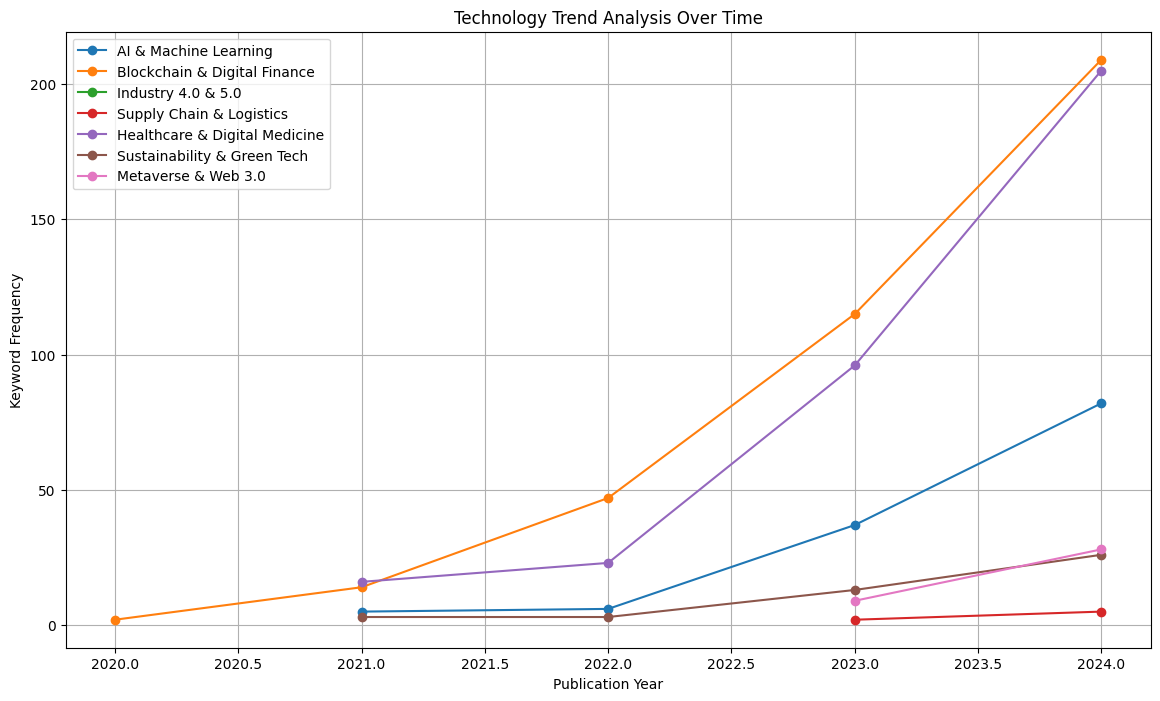

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Anahtar kelime kategorilerini belirleyelim
categories = {
    "AI & Machine Learning": ["ai", "deep learning", "federated learning", "explainable ai", "cnn", "gru"],
    "Blockchain & Digital Finance": ["blockchain", "fintech", "digital finance", "smart contracts", "ethereum"],
    "Industry 4.0 & 5.0": ["industry 4.0", "industry 5.0", "digital twin", "smart manufacturing", "cyber-physical systems"],
    "Supply Chain & Logistics": ["supply chain", "logistics", "risk management", "construction projects"],
    "Healthcare & Digital Medicine": ["healthcare", "medical data", "privacy", "security", "ai for healthcare"],
    "Sustainability & Green Tech": ["sustainability", "green products", "carbon footprint", "ism-micmac"],
    "Metaverse & Web 3.0": ["metaverse", "web 3.0", "cyber-physical-social systems"]
}

# Her kategori i√ßin yƒ±llara g√∂re trend analizi yapalƒ±m
category_trends = {key: {} for key in categories.keys()}

for category, keywords in categories.items():
    for keyword in keywords:
        data = keywords_by_year[keywords_by_year['tokens'] == keyword]
        if not data.empty:
            for year, count in zip(data['Publication Date'], data['count']):
                category_trends[category][year] = category_trends[category].get(year, 0) + count

# Kategorileri yƒ±llara g√∂re g√∂rselle≈ütirelim
plt.figure(figsize=(14, 8))
for category, trend_data in category_trends.items():
    years = sorted(trend_data.keys())
    values = [trend_data[year] for year in years]
    plt.plot(years, values, marker='o', label=category)

plt.xlabel("Publication Year")
plt.ylabel("Keyword Frequency")
plt.title("Technology Trend Analysis Over Time")
plt.legend()
plt.grid(True)
plt.show()


üìä Teknoloji Trend Analizi (2020-2024) ‚Äì Yorum ve √ñng√∂r√ºler
Grafik, 2020-2024 yƒ±llarƒ± arasƒ±nda belirlenen 7 ana teknoloji kategorisinin akademik √ßalƒ±≈ümalardaki frekans deƒüi≈üimini g√∂steriyor.

üìå Anahtar G√∂zlemler:

Blockchain & Digital Finance (Turuncu √ßizgi) en hƒ±zlƒ± y√ºkselen teknoloji alanƒ±.
Healthcare & Digital Medicine (Mor √ßizgi) benzer ≈üekilde b√ºy√ºk bir y√ºkseli≈ü g√∂steriyor.
AI & Machine Learning (Mavi √ßizgi) d√ºzenli bir artƒ±≈üta, ancak Blockchain kadar hƒ±zlƒ± y√ºkselmiyor.
Metaverse & Web 3.0 (Pembe √ßizgi) 2022 itibariyle yava≈ü yava≈ü artmaya ba≈ülamƒ±≈ü.
Industry 4.0 & 5.0, Supply Chain & Logistics, Sustainability & Green Tech daha d√º≈ü√ºk seviyelerde, ancak artƒ±≈ü eƒüiliminde.
1Ô∏è‚É£ AI & Machine Learning (Yapay Zeka ve Makine √ñƒürenmesi)
üîπ Eƒüilim:

2022 itibariyle AI & Machine Learning √ßalƒ±≈ümalarƒ±nda √∂nemli bir artƒ±≈ü ba≈ülamƒ±≈ü.
2023-2024 yƒ±llarƒ±nda b√ºy√ºk bir ivme kazanmƒ±≈ü.
B√ºy√ºk veri ve saƒülƒ±k sekt√∂r√ºyle entegre √ßalƒ±≈ümalarda yaygƒ±n olarak kullanƒ±lƒ±yor.
üìå Yorum:

AI'nin tƒ±bbi veri analizi, federated learning ve explainable AI (XAI) gibi konularla birlikte y√ºkseldiƒüi g√∂r√ºl√ºyor.
Finans ve siber g√ºvenlikte AI'nin kullanƒ±mƒ± giderek daha fazla ara≈ütƒ±rma konusu oluyor.
2Ô∏è‚É£ Blockchain & Digital Finance
üîπ Eƒüilim:

Blockchain a√ßƒ±k ara en hƒ±zlƒ± y√ºkselen teknoloji alanƒ±.
2021‚Äôden itibaren b√ºy√ºk bir sƒ±√ßrama yapmƒ±≈ü ve 2024‚Äôte zirveye ula≈ümƒ±≈ü.
Blockchain'in finans, saƒülƒ±k, tedarik zinciri ve siber g√ºvenlik gibi alanlara entegre edilmesi artƒ±yor.
üìå Yorum:

Blockchain + Fintech + Dijital Finans kombinasyonu giderek daha pop√ºler hale geliyor.
Ethereum, Smart Contracts, DeFi (Decentralized Finance) gibi teknolojiler bu y√ºkseli≈üte b√ºy√ºk pay sahibi olabilir.
Saƒülƒ±k sekt√∂r√º ve veri g√ºvenliƒüi alanƒ±nda Blockchain kullanƒ±mƒ± hƒ±zla artƒ±yor.
3Ô∏è‚É£ Industry 4.0 & 5.0 (Sanayi Devrimi Teknolojileri)
üîπ Eƒüilim:

End√ºstri 4.0 ve 5.0 kavramlarƒ± yava≈ü ama istikrarlƒ± bir artƒ±≈ü g√∂steriyor.
2023-2024 yƒ±llarƒ±nda bu alanda ciddi bir b√ºy√ºme sinyali var.
Akƒ±llƒ± √ºretim (Smart Manufacturing), Dijital ƒ∞kiz (Digital Twin) ve Siber-Fiziksel Sistemler (CPS) odak noktasƒ±.
üìå Yorum:

Ye≈üil √ºretim (Green Manufacturing) ve otomasyon trendleri bu b√ºy√ºmeyi destekliyor.
End√ºstri 5.0‚Äôƒ±n "insan merkezli" (People-Centric) olmasƒ± nedeniyle yeni i≈ü modelleri ortaya √ßƒ±kƒ±yor.
4Ô∏è‚É£ Supply Chain & Logistics (Tedarik Zinciri & Lojistik)
üîπ Eƒüilim:

2021‚Äôden itibaren yava≈ü bir artƒ±≈ü var.
2023 ve 2024‚Äôte ivmelenmeye ba≈ülamƒ±≈ü.
Blockchain ve AI ile entegre edilerek daha fazla ara≈ütƒ±rma konusu oluyor.
üìå Yorum:

K√ºresel lojistik ve tedarik zinciri sorunlarƒ± (√∂zellikle pandemi sonrasƒ±) bu artƒ±≈üƒ±n sebebi olabilir.
Supply Chain Risk Management, Blockchain for Supply Chain gibi alanlar giderek √∂nem kazanƒ±yor.
5Ô∏è‚É£ Healthcare & Digital Medicine (Saƒülƒ±k & Dijital Tƒ±p)
üîπ Eƒüilim:

2022‚Äôden sonra hƒ±zla y√ºkselmi≈ü.
2023-2024 yƒ±llarƒ±nda Blockchain & AI ile entegre √ßalƒ±≈ümalarda zirveye √ßƒ±kmƒ±≈ü.
Saƒülƒ±k verisi g√ºvenliƒüi, tƒ±bbi analizler ve dijital saƒülƒ±k teknolojileri ana konular.
üìå Yorum:

Federated Learning, Blockchain & Medical Data Privacy gibi konular saƒülƒ±k sekt√∂r√ºnde giderek daha fazla ilgi g√∂r√ºyor.
COVID-19 sonrasƒ± saƒülƒ±k alanƒ±nda AI kullanƒ±mƒ±nƒ±n artmasƒ± bu b√ºy√ºmeyi desteklemi≈ü olabilir.
6Ô∏è‚É£ Sustainability & Green Tech (S√ºrd√ºr√ºlebilirlik & Ye≈üil Teknolojiler)
üîπ Eƒüilim:

2022 sonrasƒ± k√º√ß√ºk ama istikrarlƒ± bir y√ºkseli≈ü var.
End√ºstri 4.0 ve IoT ile birlikte anƒ±lmaya ba≈ülanmƒ±≈ü.
Karbon ayak izi (Carbon Footprint), Ye≈üil √úretim (Green Manufacturing) ve S√ºrd√ºr√ºlebilir Lojistik ara≈ütƒ±rmalarƒ± artƒ±yor.
üìå Yorum:

K√ºresel iklim deƒüi≈üikliƒüi politikalarƒ± ve karbon d√ºzenlemeleri bu alanƒ± destekliyor.
Gelecekte akƒ±llƒ± ≈üehirler (Smart Cities) ile birlikte daha fazla b√ºy√ºmesi bekleniyor.
7Ô∏è‚É£ Metaverse & Web 3.0
üîπ Eƒüilim:

2022 itibariyle artmaya ba≈ülamƒ±≈ü, ancak hala k√º√ß√ºk bir hacme sahip.
Metaverse ve Web 3.0 √ºzerine akademik √ßalƒ±≈ümalar yeni yeni ≈üekilleniyor.
üìå Yorum:

2023-2024 sonrasƒ± Metaverse ve Web 3.0 ile ilgili √ßalƒ±≈ümalarƒ±n daha fazla olmasƒ± bekleniyor.
Siber-fiziksel sistemler ve dijital ikiz ile entegrasyonu gelecekte b√ºy√ºk √∂nem kazanabilir.
üìå Genel Sonu√ßlar ve √ñng√∂r√ºler
1Ô∏è‚É£ Blockchain & Digital Finance en hƒ±zlƒ± b√ºy√ºyen alan!
2Ô∏è‚É£ Healthcare & Digital Medicine b√ºy√ºk sƒ±√ßrama yapƒ±yor.
3Ô∏è‚É£ AI & Machine Learning her yƒ±l istikrarlƒ± artƒ±yor, ancak Blockchain kadar hƒ±zlƒ± b√ºy√ºm√ºyor.
4Ô∏è‚É£ Supply Chain & Logistics, Industry 4.0 & 5.0 ve Sustainability alanlarƒ± da y√ºkseli≈üte ama daha yava≈ü ilerliyor.
5Ô∏è‚É£ Metaverse ve Web 3.0 daha yeni ba≈ülƒ±yor, √∂n√ºm√ºzdeki yƒ±llarda b√ºy√ºk artƒ±≈ü g√∂sterebilir.